# Classificador de dígitos completo

### Alunos:

- Caio Lucas da Silva Chacon - 20200025769
- Luiz Fernando Costa dos Santos - 20200025446

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import src.linear_models as lm
import src.classifier_all_utils as utils
import src.metrics as metrics
import src.constants as const

In [2]:
train = pd.read_csv("./data/train_redu.csv")
test = pd.read_csv("./data/test_redu.csv")

# Treinamento

In [3]:
linear_reg = lm.OneVsAll("lin")
linear_reg.fit(train)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tmp_label"] = train["label"].map(lambda x: 1 if x == i else -1)


In [35]:
%%time
logistic_reg = lm.OneVsAll("log", eta=0.1, bs=512, tmax=3500000, lam=0)
logistic_reg.fit(train)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tmp_label"] = train["label"].map(lambda x: 1 if x == i else -1)


CPU times: user 23min 51s, sys: 4.54 s, total: 23min 55s
Wall time: 23min 58s


In [7]:
pocket_pla = lm.OneVsAll("pla", tmax=1500000)
pocket_pla.fit(train)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tmp_label"] = train["label"].map(lambda x: 1 if x == i else -1)


# Predição

In [14]:
X_test = test[["intensidade", "simetria"]].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]          
y_test = test["label"].values

In [36]:
y_pred_linr = [linear_reg.predict_one(i) for i in X_test]
y_pred_logr = [logistic_reg.predict_one(i) for i in X_test]
y_pred_pla = [pocket_pla.predict_one(i) for i in X_test]

### Regressão Linear

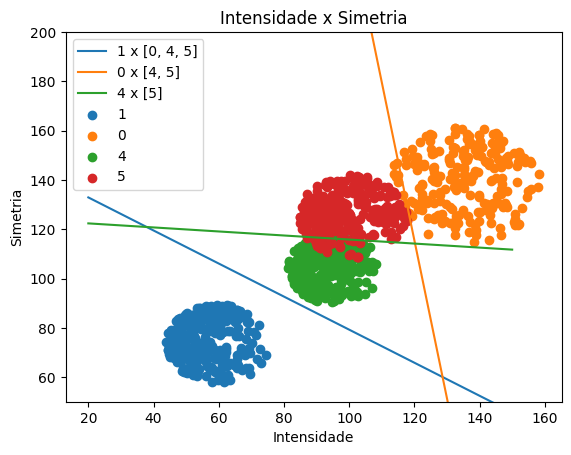

In [23]:
utils.plot_all(test, linear_reg.get_w())

### Regressão Logística

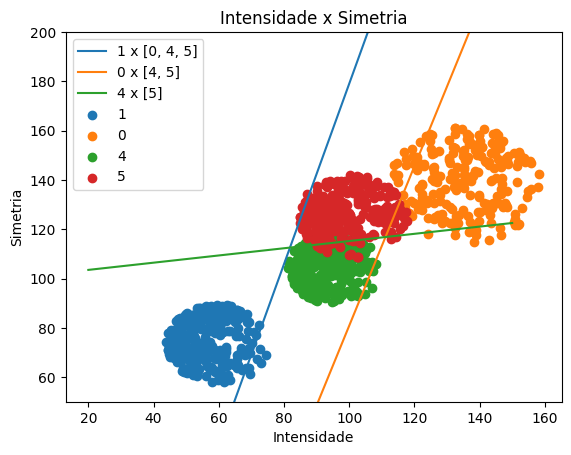

In [37]:
utils.plot_all(test, logistic_reg.get_w())

### Perceptron

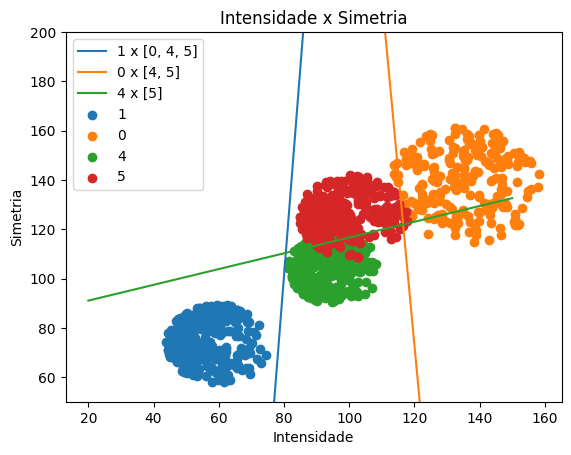

In [12]:
utils.plot_all(test, pocket_pla.get_w())

# Avaliação

### Matriz de Confusão

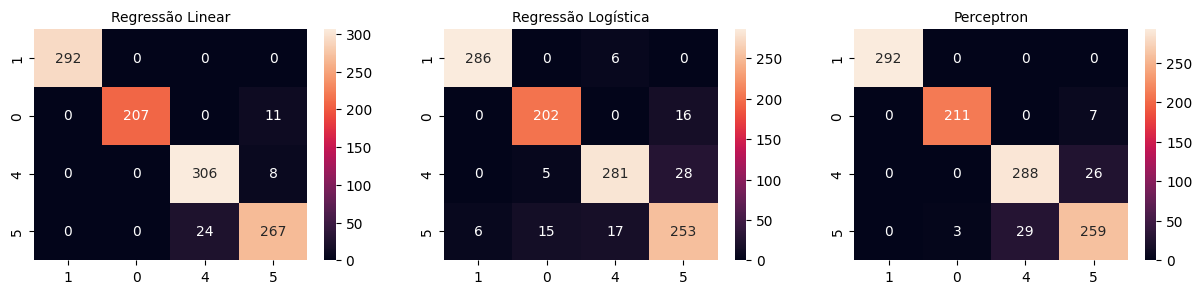

In [38]:
classes = const.ORDER
classes_str = list(map(str, const.ORDER))

cm_1 = metrics.confusion_matrix(y_test, y_pred_linr, classes)
cm_2 = metrics.confusion_matrix(y_test, y_pred_logr, classes)
cm_3 = metrics.confusion_matrix(y_test, y_pred_pla, classes)

df_cm_1 = pd.DataFrame(cm_1, index=classes_str, columns=classes_str)
df_cm_2 = pd.DataFrame(cm_2, index=classes_str, columns=classes_str)
df_cm_3 = pd.DataFrame(cm_3, index=classes_str, columns=classes_str)

fig, ax = plt.subplots(figsize = (15,3), nrows=1, ncols=3)
sn.heatmap(df_cm_1, annot=True, ax=ax[0], fmt='g')
sn.heatmap(df_cm_2, annot=True, ax=ax[1], fmt='g')
sn.heatmap(df_cm_3, annot=True, ax=ax[2], fmt='g')
ax[0].set_title("Regressão Linear", fontsize=10)
ax[1].set_title("Regressão Logística", fontsize=10)
ax[2].set_title("Perceptron", fontsize=10)
plt.show()

### Classification Reports

In [39]:
print("Regressão Linear\n")
metrics.classification_report(cm_1)
print("\nRegressão Logística\n")
metrics.classification_report(cm_2)
print("\nPerceptron\n")
metrics.classification_report(cm_3)

Regressão Linear

         precision    recall  f1-score
classes                               
1         1.000000  1.000000  1.000000
0         1.000000  0.949541  0.974118
4         0.927273  0.974522  0.950311
5         0.933566  0.917526  0.925477 

accuracy:  0.961

Regressão Logística

         precision    recall  f1-score
classes                               
1         0.979452  0.979452  0.979452
0         0.909910  0.926606  0.918182
4         0.924342  0.894904  0.909385
5         0.851852  0.869416  0.860544 

accuracy:  0.917

Perceptron

         precision    recall  f1-score
classes                               
1         1.000000  1.000000  1.000000
0         0.985981  0.967890  0.976852
4         0.908517  0.917197  0.912837
5         0.886986  0.890034  0.888508 

accuracy:  0.942
